In [1]:
import numpy as np

# Read the theta_train_no_growth.txt file
theta_train_no_growth = np.loadtxt('theta_train_no_growth.txt')

# Read the AFS_train_no_growth.txt file
AFS_train_no_growth = np.loadtxt('AFS_train_no_growth.txt')

# Read the theta_test_no_growth.txt file
theta_test_no_growth = np.loadtxt('theta_test_no_growth.txt')

# Read the AFS_test_no_growth.txt file
AFS_test_no_growth = np.loadtxt('AFS_test_no_growth.txt')

# Display the data
print("Theta Train Data:")
print(theta_train_no_growth)
print("\nAFS Train Data:")
print(AFS_train_no_growth)
print("\nTheta Test Data:")
print(theta_test_no_growth)
print("\nAFS Test Data:")
print(AFS_test_no_growth)

Theta Train Data:
[41.4878 41.4878 41.4878 ... 38.2319 38.2319 38.2319]

AFS Train Data:
[[30. 14.  7. ...  0.  0.  0.]
 [37. 24. 19. ...  0.  0.  0.]
 [59. 10. 19. ...  0.  0.  0.]
 ...
 [43. 19.  7. ...  0.  0.  0.]
 [35. 15. 31. ...  0.  0.  0.]
 [26.  8. 26. ...  0.  0.  0.]]

Theta Test Data:
[ 0.881811  0.881811  0.881811  0.881811  0.881811  0.881811  0.881811
  0.881811  0.881811  0.881811 18.4724   18.4724   18.4724   18.4724
 18.4724   18.4724   18.4724   18.4724   18.4724   18.4724   11.7326
 11.7326   11.7326   11.7326   11.7326   11.7326   11.7326   11.7326
 11.7326   11.7326   29.4368   29.4368   29.4368   29.4368   29.4368
 29.4368   29.4368   29.4368   29.4368   29.4368   22.59     22.59
 22.59     22.59     22.59     22.59     22.59     22.59     22.59
 22.59     40.271    40.271    40.271    40.271    40.271    40.271
 40.271    40.271    40.271     8.29946   8.29946   8.29946   8.29946
  8.29946   8.29946   8.29946   8.29946   8.29946   8.29946   1.16439
  1.16439   

In [2]:
from sklearn.linear_model import LinearRegression

# Reshape theta_train_no_growth to be a 2D array
theta_train_no_growth_reshaped = theta_train_no_growth.reshape(-1, 1)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(theta_train_no_growth_reshaped, AFS_train_no_growth)

# Display the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[1.00103296]
 [0.49688889]
 [0.33035968]
 [0.25074802]
 [0.20450141]
 [0.16467121]
 [0.14331324]
 [0.13294539]
 [0.11220427]
 [0.10174289]
 [0.08933053]
 [0.08959317]
 [0.07241446]
 [0.07163207]
 [0.07009948]
 [0.0632143 ]
 [0.05950021]
 [0.0548557 ]
 [0.04768498]
 [0.04854862]
 [0.05047267]
 [0.04653192]
 [0.04441978]
 [0.03960405]
 [0.04110617]
 [0.03495669]
 [0.04166756]
 [0.03233711]
 [0.03343714]
 [0.0299438 ]
 [0.03103573]
 [0.03133977]
 [0.03060308]
 [0.02771358]
 [0.02680014]
 [0.02836665]
 [0.02830883]
 [0.02763556]
 [0.02592039]
 [0.02666204]
 [0.02368169]
 [0.0224776 ]
 [0.02067912]
 [0.02250817]
 [0.02240974]
 [0.0213385 ]
 [0.01912241]
 [0.02146413]
 [0.02028951]
 [0.01934276]
 [0.01862224]
 [0.01888516]
 [0.01662321]
 [0.01803783]
 [0.01661787]
 [0.01724351]
 [0.0162192 ]
 [0.01653759]
 [0.01675868]
 [0.01869605]
 [0.01654183]
 [0.01676626]
 [0.01677745]
 [0.01675945]
 [0.01579476]
 [0.01425399]
 [0.01540212]
 [0.01287662]
 [0.01285148]
 [0.01267536]
 [0.01

In [3]:
# training set
from sklearn.metrics import mean_squared_error

# Predict the AFS_train_no_growth values using the model
AFS_train_no_growth_pred = model.predict(theta_train_no_growth_reshaped)

# Calculate the correlation coefficient
correlation = np.corrcoef(AFS_train_no_growth.flatten(), AFS_train_no_growth_pred.flatten())[0, 1]

# Print the correlation coefficient
print("Correlation Coefficient:", correlation)

Correlation Coefficient: 0.6379151626132943


In [4]:
# Reshape AFS_train_no_growth to be a 2D array if necessary
AFS_train_no_growth_reshaped = AFS_train_no_growth.reshape(AFS_train_no_growth.shape[0], -1)

# Create and fit the linear regression model
model_afs_to_theta = LinearRegression()
model_afs_to_theta.fit(AFS_train_no_growth_reshaped, theta_train_no_growth)

# Reshape AFS_test_no_growth to be a 2D array if necessary
AFS_test_no_growth_reshaped = AFS_test_no_growth.reshape(AFS_test_no_growth.shape[0], -1)

# Predict the theta_test_no_growth values using the new model
theta_test_no_growth_pred = model_afs_to_theta.predict(AFS_test_no_growth_reshaped)
# Print the predicted theta_test_no_growth values
print("Predicted Theta Test Values:", theta_test_no_growth_pred)

# Calculate the mean squared error between the predicted and actual theta_test_no_growth
mse_theta_test_no_growth = mean_squared_error(theta_test_no_growth, theta_test_no_growth_pred)

# Print the mean squared error
print("Mean Squared Error on Theta Test Set:", mse_theta_test_no_growth)

# Calculate the mean absolute error
mae_theta_test_no_growth = np.mean(np.abs(theta_test_no_growth - theta_test_no_growth_pred))

# Calculate the R² score
r2_score_theta_test_no_growth = model_afs_to_theta.score(AFS_test_no_growth_reshaped, theta_test_no_growth)

# Print all three metrics
print("Model Evaluation:")
print("Mean Squared Error:", mse_theta_test_no_growth)
print("Mean Absolute Error:", mae_theta_test_no_growth)
print("R² Score:", r2_score_theta_test_no_growth)

Predicted Theta Test Values: [ 3.38734762  2.79819056  3.34151372  3.54011057  3.40441222  3.53856723
  2.83152098  3.54816746  3.57695951  3.58169904 19.24168155 20.63173389
 14.74688025 18.48065278 17.17089006 16.71085927 17.9401983  21.00803513
 18.86234753 16.21378707 13.5306223  13.93201351 13.725156   17.89654358
 15.55431396 11.18857822 11.42533797 17.46247574 12.75954817 11.75128694
 38.96168721 29.63124123 26.60164459 26.00799386 25.75235097 30.68915562
 27.63806065 29.98724431 27.10118388 23.39407345 22.60534676 21.33086452
 22.37083684 23.41408471 24.42858669 17.83790128 19.25390143 18.93801954
 26.00504136 22.2525802  32.59981251 41.08947476 32.72210126 37.14106558
 37.38439673 31.95760109 35.460767   42.57625515 40.0441019   7.46554406
 10.20695736  9.6309778  10.03459852  9.37229765 12.02183778 10.39208715
 11.26777636 13.30178113 10.01513973  5.1834712   4.80554895  3.51212514
  2.85333198  4.25529146  4.19262649  3.07311139  3.71025751  4.09955158
  3.48438891  4.539388

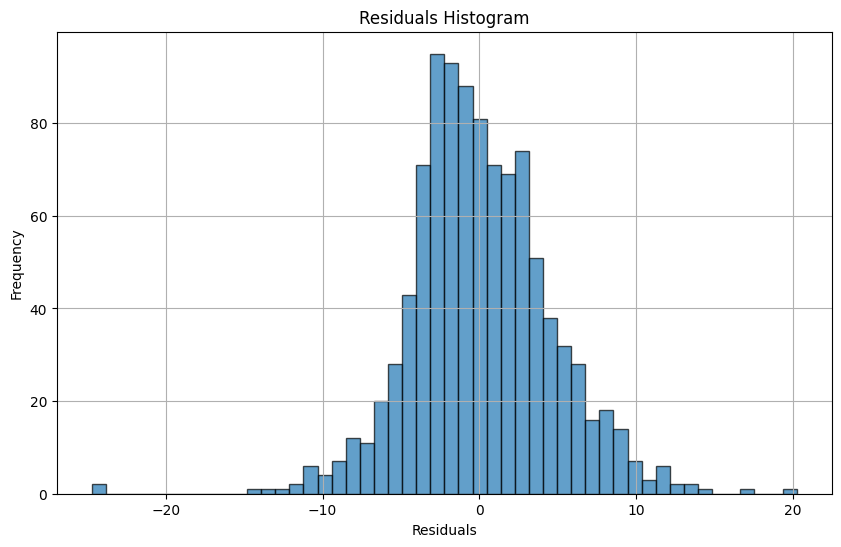

In [5]:
import matplotlib.pyplot as plt

# Calculate the residuals
residuals = theta_test_no_growth - theta_test_no_growth_pred

# Plot the histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, edgecolor='k', alpha=0.7)
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

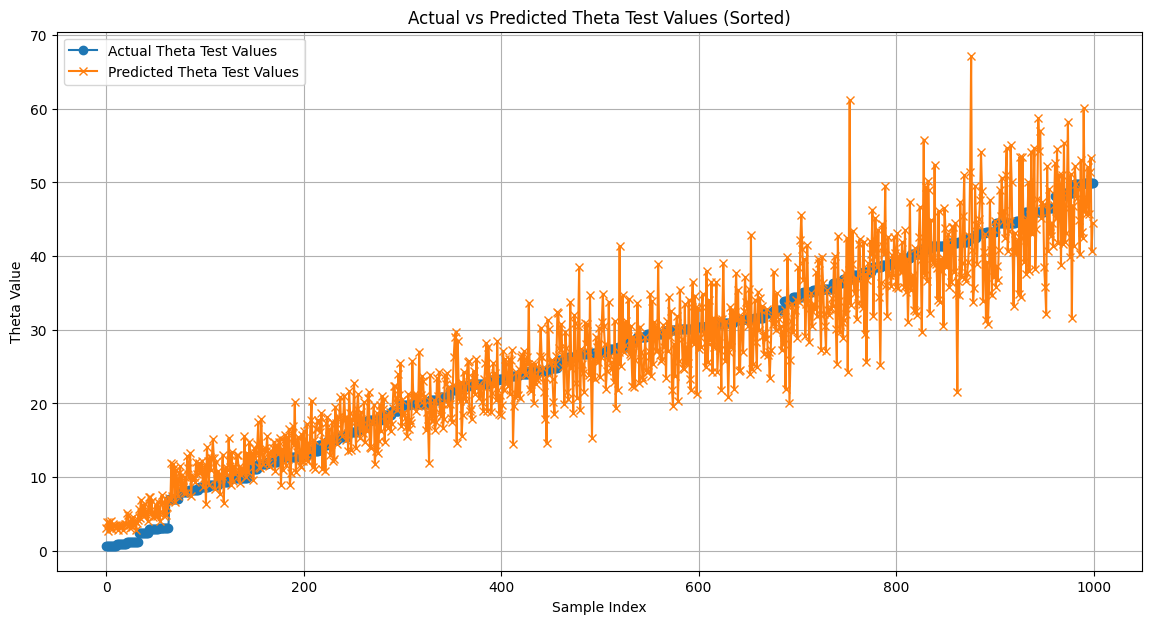

In [6]:
# Sort the actual theta values and corresponding predicted values
sorted_indices = np.argsort(theta_test_no_growth)
sorted_theta_test_no_growth = theta_test_no_growth[sorted_indices]
sorted_theta_test_no_growth_pred = theta_test_no_growth_pred[sorted_indices]

plt.figure(figsize=(14, 7))
plt.plot(sorted_theta_test_no_growth, label='Actual Theta Test Values', marker='o')
plt.plot(sorted_theta_test_no_growth_pred, label='Predicted Theta Test Values', marker='x')
plt.title('Actual vs Predicted Theta Test Values (Sorted)')
plt.xlabel('Sample Index')
plt.ylabel('Theta Value')
plt.legend()
plt.grid(True)
plt.show()

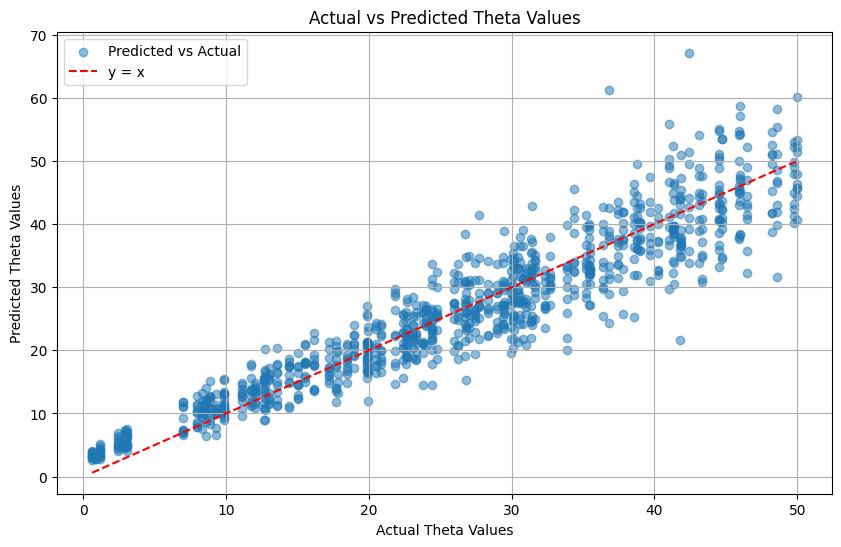

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(theta_test_no_growth, theta_test_no_growth_pred, alpha=0.5, label='Predicted vs Actual')
plt.plot([min(theta_test_no_growth), max(theta_test_no_growth)], [min(theta_test_no_growth), max(theta_test_no_growth)], color='red', linestyle='--', label='y = x')
plt.title('Actual vs Predicted Theta Values')
plt.xlabel('Actual Theta Values')
plt.ylabel('Predicted Theta Values')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Read the new files
AFS_growth_test_filled = np.loadtxt('AFS_growth_test_filled.txt')
AFS_growth_train_filled = np.loadtxt('AFS_growth_train_filled.txt')
growth_test = np.loadtxt('theta_test.txt')
growth_train = np.loadtxt('theta_train.txt')

# Display the data
print("AFS Growth Test Filled Data:")
print(AFS_growth_test_filled)
print("\nAFS Growth Train Filled Data:")
print(AFS_growth_train_filled)
print("\nGrowth Test Data (Theta):")
print(growth_test)
print("\nGrowth Train Data (Theta):")
print(growth_train)

AFS Growth Test Filled Data:
[[10.  6.  0. ...  0.  0.  0.]
 [17.  8.  1. ...  0.  0.  0.]
 [10.  3.  0. ...  0.  0.  0.]
 ...
 [ 5.  3.  2. ...  0.  0.  0.]
 [45. 18.  7. ...  0.  0.  0.]
 [10.  5.  2. ...  0.  0.  0.]]

AFS Growth Train Filled Data:
[[12.  2.  3. ...  0.  0.  0.]
 [11.  3.  3. ...  0.  0.  0.]
 [12.  2.  0. ...  0.  0.  0.]
 ...
 [11.  7.  2. ...  0.  0.  0.]
 [16.  4.  1. ...  0.  0.  0.]
 [ 5.  1.  2. ...  0.  0.  0.]]

Growth Test Data (Theta):
[19.305002 20.327783 25.935548  8.07144  31.667031 23.162875 10.768527
 39.607714 36.614535 40.607725 16.118907 29.183343  4.656394 39.478599
 23.330393 49.517545 39.868063 18.950541 23.858286 35.235718 47.717597
  8.032549 43.454268 43.010344 33.165182  4.071387 11.117481 10.697351
 21.335005 42.901064 27.311978  8.730248 36.041253 24.07691  40.089229
  9.651104 14.688285 49.975982 18.332141 40.113578 48.148124 10.40257
 33.614209 26.251992 10.299215  8.331093 25.890452 31.597501 24.625862
  6.676867  9.54883  14.062746 48

In [8]:
# Reshape AFS_growth_train_filled to be a 2D array if necessary
AFS_growth_train_filled_reshaped = AFS_growth_train_filled.reshape(AFS_growth_train_filled.shape[0], -1)

# Create and fit the linear regression model
model_afs_to_growth = LinearRegression()
model_afs_to_growth.fit(AFS_growth_train_filled_reshaped, growth_train)

# Reshape AFS_growth_test_filled to be a 2D array if necessary
AFS_growth_test_filled_reshaped = AFS_growth_test_filled.reshape(AFS_growth_test_filled.shape[0], -1)

# Predict the growth_test values (theta) using the new model
growth_test_pred = model_afs_to_growth.predict(AFS_growth_test_filled_reshaped)

# Print the predicted growth_test values (theta)
print("Predicted Growth Test Values (Theta):", growth_test_pred)

# Calculate the mean squared error between the predicted and actual growth_test (theta)
mse_growth_test = mean_squared_error(growth_test, growth_test_pred)

# Print the mean squared error
print("Mean Squared Error on Growth Test Set (Theta):", mse_growth_test)

# Calculate the mean absolute error
mae_growth_test = np.mean(np.abs(growth_test - growth_test_pred))
# Calculate the R² score
r2_score_growth_test = model_afs_to_growth.score(AFS_growth_test_filled_reshaped, growth_test)

# Print all three metrics
print("Model Evaluation:")
print("Mean Squared Error:", mse_growth_test)
print("Mean Absolute Error:", mae_growth_test)
print("R² Score:", r2_score_growth_test)

Predicted Growth Test Values (Theta): [20.56510276 31.19917828 20.57520279 21.50971344 13.51570436 10.80941016
  9.76077576 32.27044628 36.01256778 23.68046501  8.4813173  34.36711252
 23.33377059 19.9880487  10.8560276  12.85639263 22.57420718 24.27260932
 16.77277537 14.62444659 30.28724383 13.27550377 15.35094699 16.15160854
 22.21234014 29.50753567 11.4210523  19.34231954 45.58914389  6.87352293
 34.59736839 11.17015218  8.11690135 41.00607834 55.79634945 40.30096862
 26.07606213 10.7062895  40.73123868 23.11555032  9.71744704 15.9578796
  7.93484458 34.45041483 17.69275208 27.3653287  16.71696692 37.79532462
 15.74779762 11.09033432 28.69101374 39.77029201 28.13592676 34.63629478
 25.30850317 44.88945047  9.50879051 10.65347414  8.37113173 18.53749083
 16.05073766 16.61353718 29.44224952 18.06036305 14.43502964 18.17818259
 14.08536217 30.62088919 10.01379938 36.85493176 45.75168348 19.46451784
  6.87352293 45.18193965 25.6693537  44.8541916  32.38266143  9.97135575
 24.46319532  

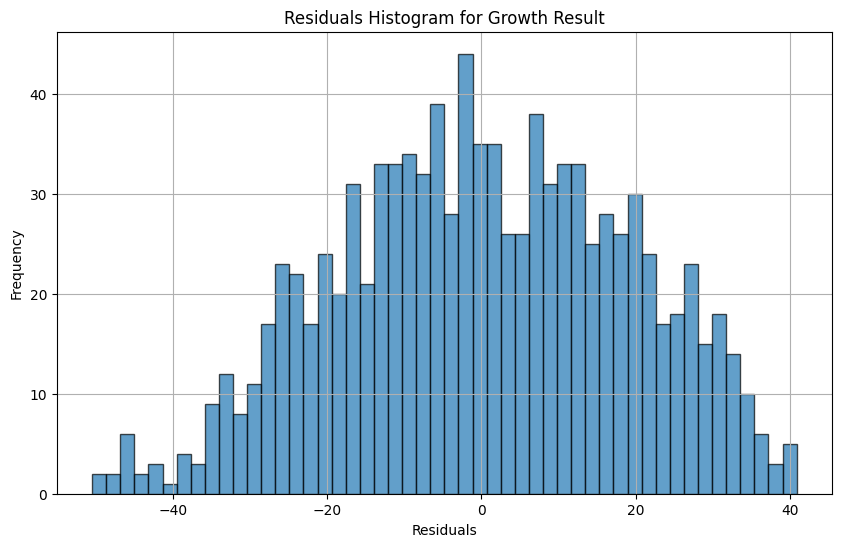

In [9]:
# Calculate the residuals for the growth result
residuals_growth = growth_test - growth_test_pred

# Plot the histogram of residuals for the growth result
plt.figure(figsize=(10, 6))
plt.hist(residuals_growth, bins=50, edgecolor='k', alpha=0.7)
plt.title('Residuals Histogram for Growth Result')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


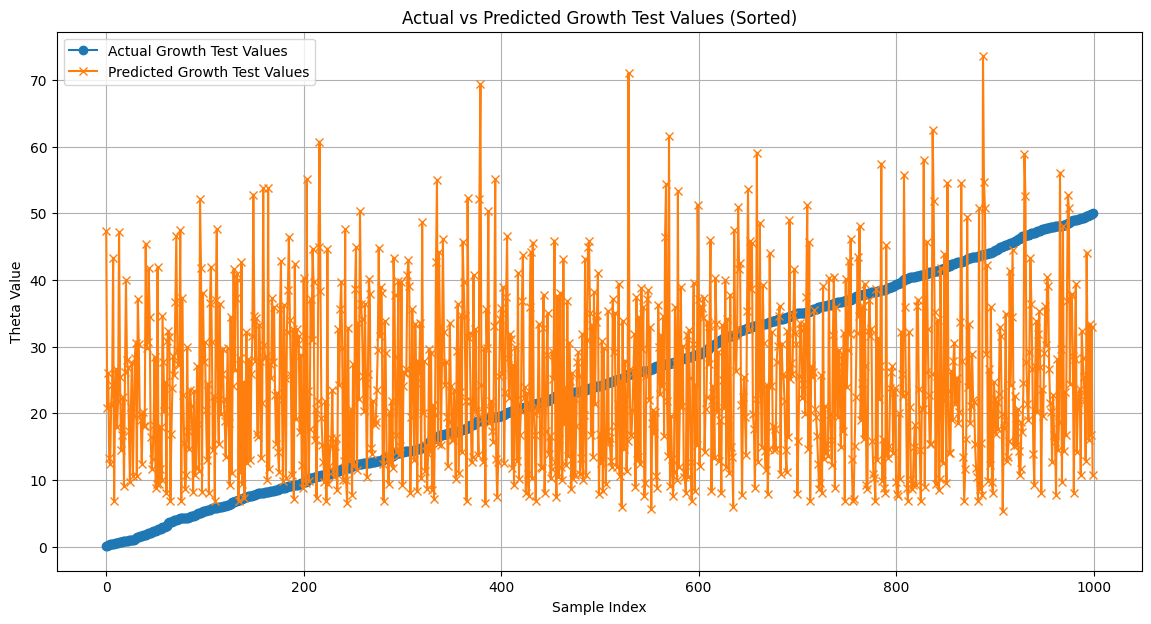

In [10]:
# Sort the actual growth theta values and corresponding predicted values
sorted_indices_growth = np.argsort(growth_test)
sorted_growth_test = growth_test[sorted_indices_growth]
sorted_growth_test_pred = growth_test_pred[sorted_indices_growth]

plt.figure(figsize=(14, 7))
plt.plot(sorted_growth_test, label='Actual Growth Test Values', marker='o')
plt.plot(sorted_growth_test_pred, label='Predicted Growth Test Values', marker='x')
plt.title('Actual vs Predicted Growth Test Values (Sorted)')
plt.xlabel('Sample Index')
plt.ylabel('Theta Value')
plt.legend()
plt.grid(True)
plt.show()

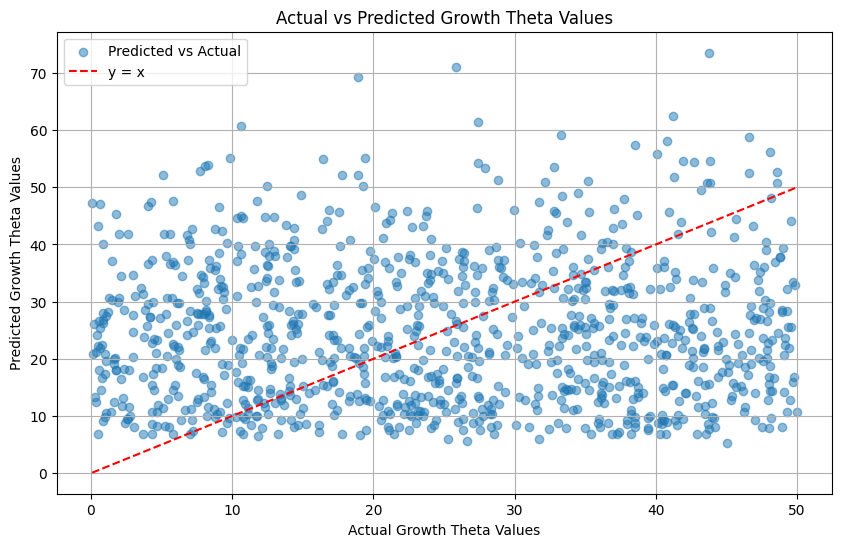

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(growth_test, growth_test_pred, alpha=0.5, label='Predicted vs Actual')
plt.plot([min(growth_test), max(growth_test)], [min(growth_test), max(growth_test)], color='red', linestyle='--', label='y = x')
plt.title('Actual vs Predicted Growth Theta Values')
plt.xlabel('Actual Growth Theta Values')
plt.ylabel('Predicted Growth Theta Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

# Load the data
AFS_growth_train_filled = np.loadtxt('AFS_growth_train_filled.txt')
#growth_train = np.loadtxt('growth_train.txt')
AFS_growth_test_filled = np.loadtxt('AFS_growth_test_filled.txt')
#growth_test = np.loadtxt('growth_test.txt')
# No log transformation applied

# Normalize the data
scaler = StandardScaler()
AFS_growth_train_filled = scaler.fit_transform(AFS_growth_train_filled)
AFS_growth_test_filled = scaler.transform(AFS_growth_test_filled)

# Use the entire training data for training
X_train, y_train = AFS_growth_train_filled, growth_train

# Build the CNN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(AFS_growth_train_filled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model on the test data
test_loss, test_mae = model.evaluate(AFS_growth_test_filled, growth_test)
print(f"Test MAE: {test_mae}")

# Predict the growth_test values (theta)
growth_test_pred_cnn = model.predict(AFS_growth_test_filled)

# Print the predicted growth_test values (theta)
print("Predicted Growth Test Values (Theta):", growth_test_pred_cnn.flatten())


Epoch 1/50


C:\Users\xuech\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 707.0654 - mae: 22.7819
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 138.4870 - mae: 9.1913
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 74.2376 - mae: 6.6647
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 64.6325 - mae: 6.1699
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 58.7140 - mae: 5.8259
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 54.8912 - mae: 5.6237
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 51.8394 - mae: 5.5111
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 49.8710 - mae: 5.4081
Epoch 9/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 47.3241 - mae: 5.2755
Epoch 10/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 45.2914 - mae: 5.1605
Epoch 11/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 45.1327 - mae: 5.1869
Epoch 12/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 44.1141 - mae: 5.1096
Epoch 13/50
625/625 ━

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the Mean Squared Error
mse_cnn = mean_squared_error(growth_test, growth_test_pred_cnn)

# Calculate the Mean Absolute Error
mae_cnn = np.mean(np.abs(growth_test - growth_test_pred_cnn))

# Calculate the R² Score
r2_score_cnn = r2_score(growth_test, growth_test_pred_cnn)

# Calculate the correlation coefficient
correlation_cnn = np.corrcoef(growth_test.flatten(), growth_test_pred_cnn.flatten())[0, 1]

# Print the values
print("Mean Squared Error:", mse_cnn)
print("Mean Absolute Error:", mae_cnn)
print("R² Score:", r2_score_cnn)
print("Correlation Coefficient:", correlation_cnn)

Mean Squared Error: 381.73097162837513
Mean Absolute Error: 15.94870815248211
R² Score: -0.8564135079383766
Correlation Coefficient: -0.0019319099634398538


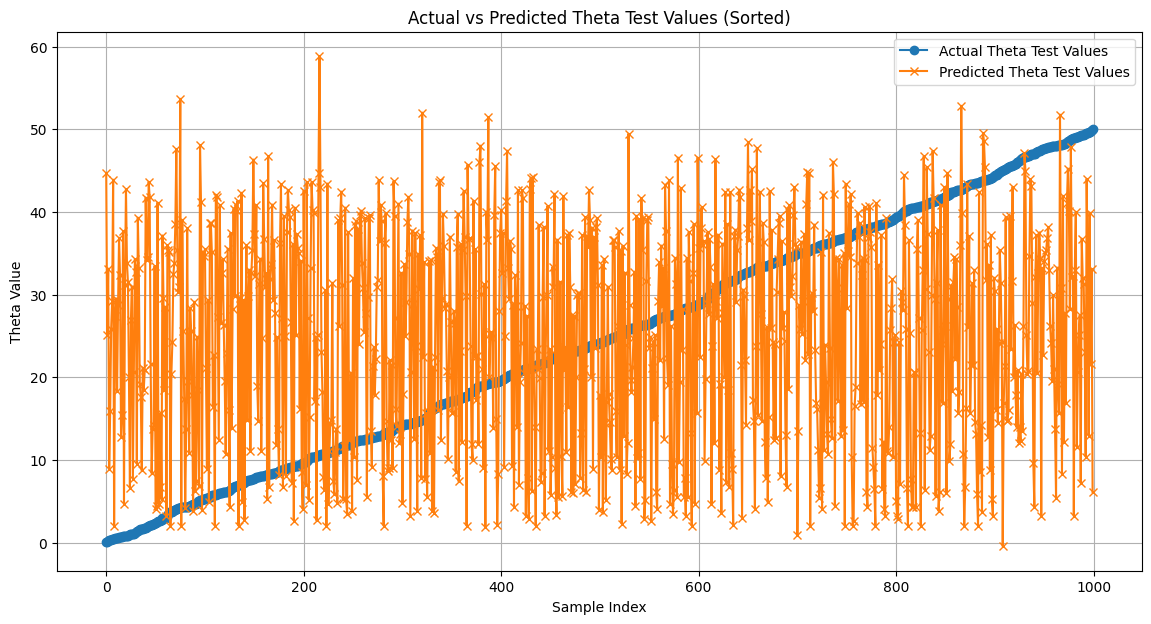

In [13]:
# Sort the actual theta values and corresponding predicted values
sorted_indices = np.argsort(theta_test_no_growth)
sorted_indices = np.argsort(growth_test)
sorted_growth_test = growth_test[sorted_indices]
sorted_growth_test_pred_cnn = growth_test_pred_cnn.flatten()[sorted_indices]

plt.figure(figsize=(14, 7))
plt.plot(sorted_growth_test, label='Actual Theta Test Values', marker='o')
plt.plot(sorted_growth_test_pred_cnn, label='Predicted Theta Test Values', marker='x')
plt.title('Actual vs Predicted Theta Test Values (Sorted)')
plt.xlabel('Sample Index')
plt.ylabel('Theta Value')
plt.legend()
plt.grid(True)
plt.show()

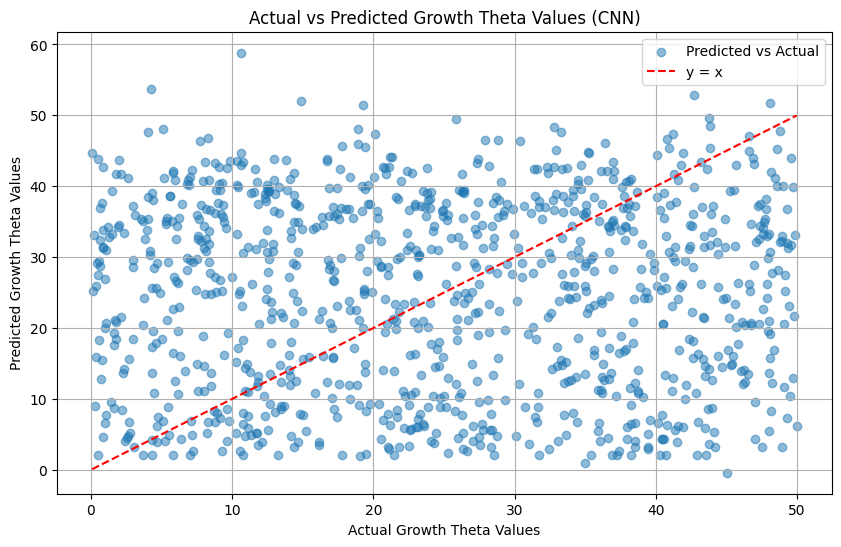

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(growth_test, growth_test_pred_cnn, alpha=0.5, label='Predicted vs Actual')
plt.plot([min(growth_test), max(growth_test)], [min(growth_test), max(growth_test)], color='red', linestyle='--', label='y = x')
plt.title('Actual vs Predicted Growth Theta Values (CNN)')
plt.xlabel('Actual Growth Theta Values')
plt.ylabel('Predicted Growth Theta Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten
from sklearn.preprocessing import StandardScaler

# Function to parse SNP data
def parse_snp_file(file_path):
    with open(file_path, 'r') as file:
        data = file.read().split('//')
    # Count the number of data chunks
    num_chunks = len(data)
    print("Number of data chunks:", num_chunks)
    snp_matrices = []
    for block in data:
        if 'segsites' in block and 'positions' in block:
            lines = block.strip().split('\n')
            # Extract the SNP matrix
            snp_matrix = []
            for line in lines:
                if line.startswith('positions:'):
                    continue
                if line.startswith('segsites:'):
                    continue
                if line.startswith(''):
                    continue
                if line.startswith('AFS:'):
                    continue
                snp_matrix.append([int(char) for char in line.strip()])
            # snp_matrices.append(np.array(snp_matrix))
            first_matrix = snp_matrices[0]
            print("First two lines of the first matrix:")
            print(first_matrix[:2])
            print("\nLast two lines of the first matrix:")
            print(first_matrix[-2:])
            break
    return snp_matrices

# Load the SNP data
snp_train = parse_snp_file('SNP_train.txt')
# Print the first two and last two lines of the first matrix
first_matrix = snp_train[0]
print("First two lines of the first matrix:")
print(first_matrix[:2])
print("\nLast two lines of the first matrix:")
print(first_matrix[-2:])
# Count the number of SNP matrices
num_snp_matrices = len(snp_train)
print("Number of SNP matrices:", num_snp_matrices)

# Load the theta values
theta_train = np.loadtxt('theta_train.txt')

# Pad the SNP matrices to ensure they all have the same length
#max_length = max(len(matrix) for matrix in snp_train)
max_row_length = max(len(row) for matrix in snp_train for row in matrix)
snp_train_padded = [np.pad(matrix, ((0, max_length - len(matrix)), (0, max_row_length - len(matrix[0]))), mode='constant') for matrix in snp_train]
first_matrix_padded = snp_train_padded[0]
print("padded:")
print(first_matrix_padded[:2])
print("\npadded:")
print(first_matrix_padded[-2:])
# Convert the list of padded matrices to a NumPy array
snp_train = np.array(snp_train_padded)

# Normalize the SNP data
scaler = StandardScaler()
snp_train = scaler.fit_transform(snp_train.reshape(-1, snp_train.shape[-1])).reshape(snp_train.shape)

# Build the CNN model
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(snp_train.shape[1], snp_train.shape[2])),
    Conv1D(32, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(snp_train, theta_train, epochs=50, batch_size=32)

# Evaluate the model on the training data
train_loss, train_mae = model.evaluate(snp_train, theta_train)
print(f"Train MAE: {train_mae}")

# Predict the theta values using the model
theta_train_pred = model.predict(snp_train)

# Print the predicted theta values
print("Predicted Theta Train Values:", theta_train_pred.flatten())

Number of data chunks: 20001


IndexError: list index out of range